Fake news detection is a crucial application of natural language processing (NLP) and machine learning. It involves the classification of news articles or text documents into two categories: "genuine" or "true" news and "fake" or "misleading" news. The most common logistic regression model models a binary outcome, which can take two values such as true/false, yes/no, and so on. Logistic Regression can be a useful algorithm for this task, especially when combined with NLP techniques. Here's an explanation of how you can use Logistic Regression and NLP for fake news detection:

## Importing Nltk library

In [23]:
import nltk

NLTK is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language. 

Use nltk.download() for downloading nltk library using it for the first time. 

## Importing other required modules

In [24]:
import pandas as pd

In [25]:
fake = pd.read_csv("Fake.csv")
genuine = pd.read_csv("True.csv")

### Printing Info

In [26]:
print(fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [27]:
print(genuine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [28]:
fake['target']=0

For fake news prediction will be 0

In [29]:
genuine['target']=1

For fake news prediction will be 1

In [30]:
genuine.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [31]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Data Visualization
#### Display the word cloud for fake news

(-0.5, 799.5, 399.5, -0.5)

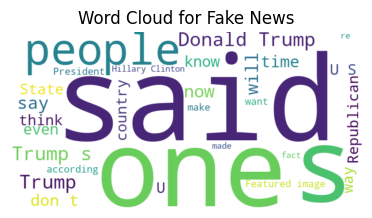

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fake_news_text = ' '.join(fake['text'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=30).generate(fake_news_text)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')


#### Display the word cloud for fake news

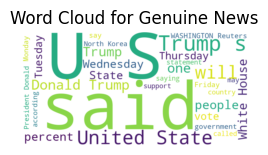

In [33]:
genuine_news_text = ' '.join(genuine['text'])
genuine_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=30).generate(genuine_news_text)
plt.subplot(1, 2, 2)
plt.imshow(genuine_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Genuine News')
plt.axis('off')

plt.show()

The words size displayed is depending upon the number of times the word is repeated. The more the word repreats the greater the size.

## Concatenating both datasets

In [34]:
df=pd.concat([fake,genuine],axis=0) 
df=df.reset_index(drop=True)

Dropping unnecessary columns

In [35]:
df=df.drop(['subject','date','title'],axis=1)
df.columns

Index(['text', 'target'], dtype='object')

In [36]:
df

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


### Preprocessing data

1. Tokenizing words

In [37]:
from nltk.tokenize import word_tokenize
df['text']=df['text'].apply(word_tokenize)
df

,text,target
0,"[Donald, Trump, just, couldn, t, wish, all, Am...",0
1,"[House, Intelligence, Committee, Chairman, Dev...",0
2,"[On, Friday, ,, it, was, revealed, that, forme...",0
3,"[On, Christmas, day, ,, Donald, Trump, announc...",0
4,"[Pope, Francis, used, his, annual, Christmas, ...",0
...,...,...
44893,"[BRUSSELS, (, Reuters, ), -, NATO, allies, on,...",1
44894,"[LONDON, (, Reuters, ), -, LexisNexis, ,, a, p...",1
44895,"[MINSK, (, Reuters, ), -, In, the, shadow, of,...",1
44896,"[MOSCOW, (, Reuters, ), -, Vatican, Secretary,...",1


Word Tokenizing breaks down a text or sentence into individual words or tokens. It enables you to process and analyze text at the word level. 

2. Stemming Words

In [38]:
from nltk.stem.snowball import SnowballStemmer
ss=SnowballStemmer("english")

Snowball Stemmer is an algorithm for stemming words in the English language. Stemming is the process of reducing words to their base or root form, which can be useful in text processing and natural language processing tasks like information retrieval, text classification, and search. Example is the stemmer changes 'playing' word into is root word 'play'.

In [39]:
def stem_word(text):
    return[ss.stem(word) for word in text]

In [40]:
df['text']=df['text'].apply(stem_word)
df

,text,target
0,"[donald, trump, just, couldn, t, wish, all, am...",0
1,"[hous, intellig, committe, chairman, devin, nu...",0
2,"[on, friday, ,, it, was, reveal, that, former,...",0
3,"[on, christma, day, ,, donald, trump, announc,...",0
4,"[pope, franci, use, his, annual, christma, day...",0
...,...,...
44893,"[brussel, (, reuter, ), -, nato, alli, on, tue...",1
44894,"[london, (, reuter, ), -, lexisnexi, ,, a, pro...",1
44895,"[minsk, (, reuter, ), -, in, the, shadow, of, ...",1
44896,"[moscow, (, reuter, ), -, vatican, secretari, ...",1


### Stopword Removal

In [41]:
def rem_stopwords(text):
    dt=[word for word in text if len(word)>2]
    return dt

Stopwords are words that are commonly used in a language but are generally considered to be of little value in text analysis because they don't carry significant meaning. Examples of stopwords in English include "the," "and," "is," "in," and "it." Thats why we can remove it. But here we are removing the words with less than 3 letters.
**Note** : We can use the predefined set of stopwords by importing them from nltk library.

In [42]:
df['text']=df['text'].apply(rem_stopwords)
df

,text,target
0,"[donald, trump, just, couldn, wish, all, ameri...",0
1,"[hous, intellig, committe, chairman, devin, nu...",0
2,"[friday, was, reveal, that, former, milwauke, ...",0
3,"[christma, day, donald, trump, announc, that, ...",0
4,"[pope, franci, use, his, annual, christma, day...",0
...,...,...
44893,"[brussel, reuter, nato, alli, tuesday, welcom,...",1
44894,"[london, reuter, lexisnexi, provid, legal, reg...",1
44895,"[minsk, reuter, the, shadow, disus, soviet-era...",1
44896,"[moscow, reuter, vatican, secretari, state, ca...",1


### Join text

In [43]:
df['text']=df['text'].apply(' '.join)

## Splitting to Train and test data

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['target'])

## Vectorization

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
Iv= TfidfVectorizer(max_df=0.7)

TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a common technique used in natural language processing (NLP) to convert a collection of text documents into a numerical feature matrix. The higher values represent words that are more important in the context of the entire corpus.

In [46]:
X_train = Iv.fit_transform(X_train)
X_test=Iv.transform(X_test)

In [47]:
print(X_train[:5])

  (0, 25979)	0.03858989863785295
  (0, 66643)	0.03991165274468729
  (0, 88747)	0.054544206289372184
  (0, 79163)	0.041469248116503016
  (0, 51475)	0.024826339747613953
  (0, 87878)	0.027200242666934077
  (0, 44790)	0.024829508837872945
  (0, 89134)	0.020119784949537377
  (0, 81511)	0.0298891408106327
  (0, 82314)	0.044538760382658145
  (0, 25136)	0.03531174655293688
  (0, 77686)	0.02033441448659102
  (0, 81283)	0.02624310923085074
  (0, 26128)	0.03739520501222211
  (0, 10415)	0.054375261420981744
  (0, 89836)	0.0197176376906728
  (0, 31509)	0.053882465027622534
  (0, 42215)	0.0360506350849873
  (0, 16283)	0.04665213373707209
  (0, 82338)	0.02464709342172626
  (0, 78629)	0.07445720207214435
  (0, 8035)	0.058286029043442114
  (0, 21255)	0.03768038375035468
  (0, 68999)	0.037496706928976616
  (0, 32680)	0.03397804756091951
  :	:
  (4, 81283)	0.023964671367343423
  (4, 89836)	0.01800574403134471
  (4, 69673)	0.037322177263455956
  (4, 55639)	0.019120146867376914
  (4, 46370)	0.033325006062

In [48]:
print(X_test)

  (0, 89743)	0.06985733518367644
  (0, 89134)	0.05120852675100581
  (0, 88946)	0.09011724343052373
  (0, 88169)	0.07390395726724595
  (0, 88020)	0.06899384920469837
  (0, 86669)	0.07764944191731234
  (0, 83761)	0.0831002976320462
  (0, 83399)	0.10245315340728028
  (0, 83116)	0.07750190587390408
  (0, 83061)	0.17140778588126648
  (0, 82338)	0.06273135354013958
  (0, 82269)	0.09724248032675109
  (0, 81668)	0.19395993507844447
  (0, 80370)	0.42842213926963485
  (0, 79116)	0.06645893120605102
  (0, 77587)	0.12943174369324828
  (0, 75388)	0.14543055358884777
  (0, 73689)	0.08179403298502845
  (0, 69697)	0.05183760213719738
  (0, 69384)	0.13244611966326444
  (0, 69304)	0.06223765045503189
  (0, 69279)	0.11848318044682528
  (0, 69254)	0.13667191152036484
  (0, 68739)	0.2274077084974857
  (0, 66112)	0.17220649230869303
  :	:
  (11224, 27037)	0.039493312308829874
  (11224, 26835)	0.07490805542733027
  (11224, 26299)	0.08619283831256765
  (11224, 25989)	0.050918655552312585
  (11224, 25376)	0.09

## Training model with Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Logistic Regression is a statistical and machine learning algorithm used for binary and multiclass classification problems. It's a supervised learning algorithm that is commonly used in various fields, including statistics, medical research, and machine learning.

In [50]:
m=LogisticRegression(max_iter=500)
m.fit(X_train,y_train)
prediction = m.predict(X_test)
print((accuracy_score(y_test,prediction))*100)

98.79732739420936


In [51]:
prediction

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

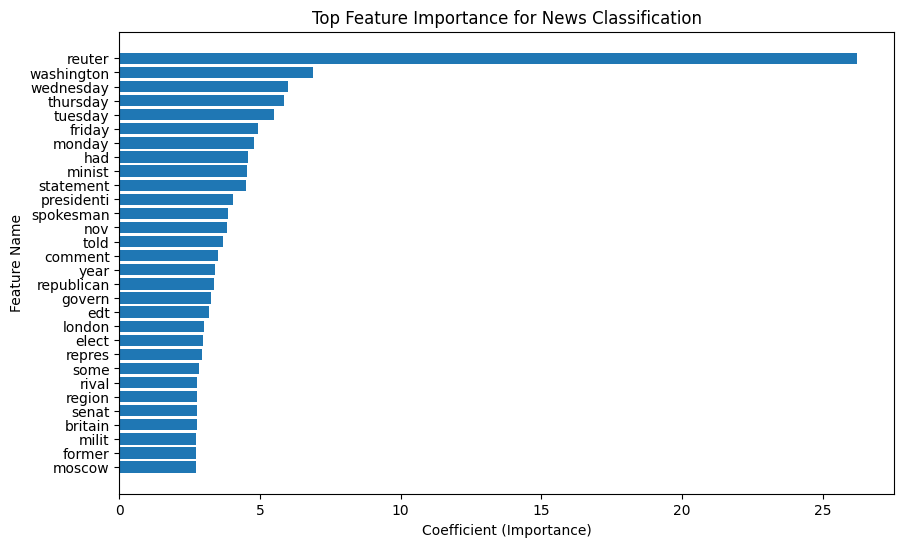

In [55]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = Iv.get_feature_names_out()

# Get the coefficients (importance) assigned by the model to each feature
coef = m.coef_[0]

# Sort the coefficients in descending order and get their corresponding feature names
sorted_indices = coef.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Select the top N important features to display in the bar chart
top_n = 30

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:top_n], coef[sorted_indices][:top_n])
plt.title('Top Feature Importance for News Classification')
plt.xlabel('Coefficient (Importance)')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis()  
plt.show()

The above words are the less repeated words that has greater priority in news classification for this model.